In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

## Assignment

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **housing prices** data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.

Please submit a link your work notebook. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to [this example solution](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/6.solution_making_predictions.ipynb).

In [0]:
## Lets get the dummies for non numerical values and add it to the features.
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [0]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     383.1
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:25:49   Log-Likelihood:                -13972.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1157   BIC:                         2.802e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.039e+05   2.06e+04     -5.037      0.000   -1.44e+05   -6.34e+04
overallqual  2.433e+04   1244.706     19.548      0.000    2.19e+04    2.68e+04
grlivarea      43.3745      2.745     15.800      0.000      37.988      48.760
garagecars   1.407e+04   3409.600      4.126      0.000    7379.047    2.08e+04
garagearea     17.5210     11.560      1.516      0.130      -5.161      40.203
totalbsmtsf    23.4504      3.183      7.368      0.000      17.206      29.695
mszoning_FV  9666.6121   7497.913      1.289      0.198   -5044.416    2.44e+04
mszoning_FV  9666.6121   7497.913      1.289      0.198   -5044.416    2.44e+04
mszoning_RH  3652.7539   8575.600      0.426      0.670   -1.32e+04    2.05e+04
mszoning_RH  3652.7539   8575.600      0.426      0.670   -1.32e+04    2.05e+04
mszoning_RL  1.215e+04   6951.547      1.747      0.081   -1491.739    2.58e+04
mszoning_RL  1.215e+04   6951.547      1.747      0.081   -1491.739    2.58e+04
mszoning_RM  1432.1535   7054.236      0.203      0.839   -1.24e+04    1.53e+04
mszoning_RM  1432.1535   7054.236      0.203      0.839   -1.24e+04    1.53e+04
street_Pave -4088.8341   8703.993     -0.470      0.639   -2.12e+04     1.3e+04
street_Pave -4088.8341   8703.993     -0.470      0.639   -2.12e+04     1.3e+04
==============================================================================
Omnibus:                      355.774   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30190.746
Skew:                          -0.383   Prob(JB):                         0.00
Kurtosis:                      27.895   Cond. No.                     2.45e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.82e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R-squared and the adjusted R-squared of the model are 0.768 and 0.766 respectively. Hence, according to the R-squared, around 23% of the variance in the target variable is unexplained by the model. AIC and BIC scores are 27970 and 28020 respectively.
Now, let's evaluate the test set performance:

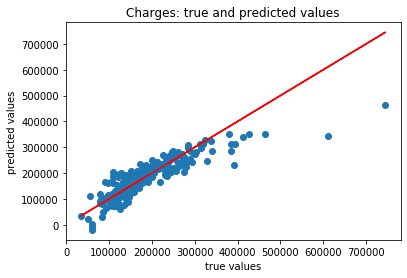

Mean absolute error of the prediction is: 25546.80382859001
Mean squared error of the prediction is: 1559083821.973025
Root mean squared error of the prediction is: 39485.23549344774
Mean absolute percentage error of the prediction is: 15.55142034753851


In [0]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


In the graph, we see that our model predicts the lower values of the target better than the higher values. By using visualizations like this, we can more intuitively understand the performance of the models. 

In [0]:
house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']

house_prices_df['int_over_sf'] = house_prices_df['totalsf'] * house_prices_df['overallqual']

# Y is the target variable
Y = np.log1p(house_prices_df['saleprice'])
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     520.9
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:26:55   Log-Likelihood:                 463.99
No. Observations:                1168   AIC:                            -904.0
Df Residuals:                    1156   BIC:                            -843.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.9162      0.102     97.518      0.000       9.717      10.116
overallqual     0.1893      0.009     20.123      0.000       0.171       0.208
grlivarea     9.58e-05   1.89e-05      5.074      0.000    5.88e-05       0.000
garagecars      0.0779      0.015      5.244      0.000       0.049       0.107
garagearea      0.0001   5.04e-05      2.132      0.033    8.57e-06       0.000
totalsf         0.0003   2.58e-05     11.139      0.000       0.000       0.000
int_over_sf -2.572e-05   3.02e-06     -8.526      0.000   -3.16e-05   -1.98e-05
mszoning_FV     0.1956      0.032      6.055      0.000       0.132       0.259
mszoning_FV     0.1956      0.032      6.055      0.000       0.132       0.259
mszoning_RH     0.1325      0.037      3.593      0.000       0.060       0.205
mszoning_RH     0.1325      0.037      3.593      0.000       0.060       0.205
mszoning_RL     0.1939      0.030      6.481      0.000       0.135       0.253
mszoning_RL     0.1939      0.030      6.481      0.000       0.135       0.253
mszoning_RM     0.1078      0.030      3.556      0.000       0.048       0.167
mszoning_RM     0.1078      0.030      3.556      0.000       0.048       0.167
street_Pave    -0.0278      0.037     -0.744      0.457      -0.101       0.046
street_Pave    -0.0278      0.037     -0.744      0.457      -0.101       0.046
==============================================================================
Omnibus:                      350.711   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2714.386
Skew:                          -1.167   Prob(JB):                         0.00
Kurtosis:                      10.094   Cond. No.                     1.55e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This second model's R-squared and adjusted R-squared values are higher and AIC and BIC criterias are lower than the first model. In any case, these indicate that the second model has a better goodness of fit than the first model. Now, let's evaluate the test set performance of this second model:

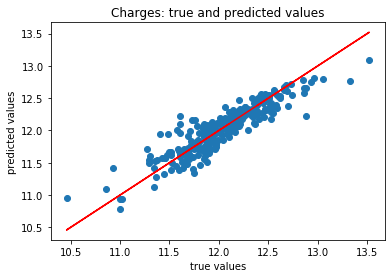

Mean absolute error of the prediction is: 0.1257037287286365
Mean squared error of the prediction is: 0.02919212187140598
Root mean squared error of the prediction is: 0.1708570217211045
Mean absolute percentage error of the prediction is: 1.050357766782342


In [0]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The test set evaluation metrics are given above. For every metric, the second model achieves a better prediction performance in the test set.